# Decision Tree Spam Detection
Originally published in DAA M05 Classification and neural networks.
## Exercise 5.10 - Spam detection with a decision tree

### Purpose:
This notebook fits a decision tree to the spam dataset that is described in Section 5.1.2 of Module 5. This code is used in Exercise 5.10.

### References:
The spam dataset is sourced from the University of California, Irvine Machine Learning Repository:   Hopkins, M., Reeber, E., Forman, G., and Suermondt, J. (1999). Spambase Data Set [Dataset]. https://archive.ics.uci.edu/ml/datasets/Spambase.

This dataset contains the following:
- 4,601 observations, each representing an email originally collected from a Hewlett-Packard email server, of which 1,813 (39%) were identified as spam;
- 57 continuous features:
  - 48 features of type ‘word_freq_WORD’ that represent the percentage (0 to 100) of words in the email that match ‘WORD’;
  - 6 features of type ‘char_freq_CHAR’ that represent the percentage (0 to 100) of characters in the email that match ‘CHAR’;
  - 1 feature, ‘capital_run_length_average’, that is the average length of uninterrupted sequences of capital letters in the email;
  - 1 feature, ‘capital_run_length_longest’, that is the length of the longest uninterrupted sequence of capital letters in the email; and
  - 1 feature, ‘capital_run_length_total’, that is the total number of capital letters in the email; and
- a binary response variable that takes on a value 0 if the email is not spam and 1 if the email is spam.




## Packages
This section imports the packages that will be required for this exercise/case study.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Used to build the decision tree and evaluate it
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics

# Used to graph the decision tree
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image

## Data
This section:
- imports the data that will be used in the modelling; and
- explores the data.

### Import data

In [2]:
# Create a list of headings for the data.
namearray = [
'word_freq_make',
'word_freq_address',
'word_freq_all',
'word_freq_3d',
'word_freq_our',
'word_freq_over',
'word_freq_remove',
'word_freq_internet',
'word_freq_order',
'word_freq_mail',
'word_freq_receive',
'word_freq_will',
'word_freq_people',
'word_freq_report',
'word_freq_addresses',
'word_freq_free',
'word_freq_business',
'word_freq_email',
'word_freq_you',
'word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab',
'word_freq_labs',
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415',
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_(',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total',
'Spam_fl' ]

# Read in the data from the Stanford website.
spam = pd.read_csv("http://www.web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.data", delim_whitespace=True, 
                   header=None,
                   names=namearray
                 )



### Explore data (EDA)

In [3]:
# Check the dimensions of the data.
print(spam.info())

# Print the first 10 observations from the data.
print(spam.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

## Modelling
This section:
- fits a model; and
- evaluates the fitted model.

### Fit model

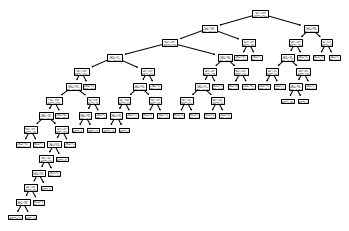

In [4]:
# Build a decision tree to classify an email as spam or non-spam.

X = spam.iloc[:,:-1] # Drops the last column of the dataframe that contains the spam indicator (response).
Y = spam['Spam_fl'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state=42)
        # This separates the data into training (75%) and test (25%) datasets.

alpha = 0.001 # Experiment with changing this value of alpha.
              # What happens to the size of the decision tree and its accuracy?

criteria = 'gini' # Experiment with changing this to an 'entropy' criterion
                  # What happens to the size of the decision tree and its accuracy?        

classifier = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=alpha, min_samples_split=20, criterion=criteria, min_samples_leaf=5)
classifier.fit(X_train, Y_train)
tree.plot_tree(classifier) 

Y_predict = classifier.predict(X_test)

### Evaluate model

In [5]:
# Calculate the confusion matrix and test accuracy.
print('Test confusion matrix:')
print(confusion_matrix(Y_test, Y_predict))
print('Test accuracy is {:.4f}.'.format(accuracy_score(Y_test, Y_predict)))

# Calculate the AUC and ROC.
Y_prob = classifier.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_prob[:,1:2])
roc_auc = metrics.auc(fpr, tpr)
print('AUC is {:.4f}.'.format(roc_auc))

# Calculate the number of terminal nodes in the tree.
num_nodes = (1+classifier.tree_.node_count)/2
print('The number of terminal nodes is {:.0f}.'.format(num_nodes))

Test confusion matrix:
[[636  40]
 [ 61 414]]
Test accuracy is 0.9123.
AUC is 0.9572.
The number of terminal nodes is 37.


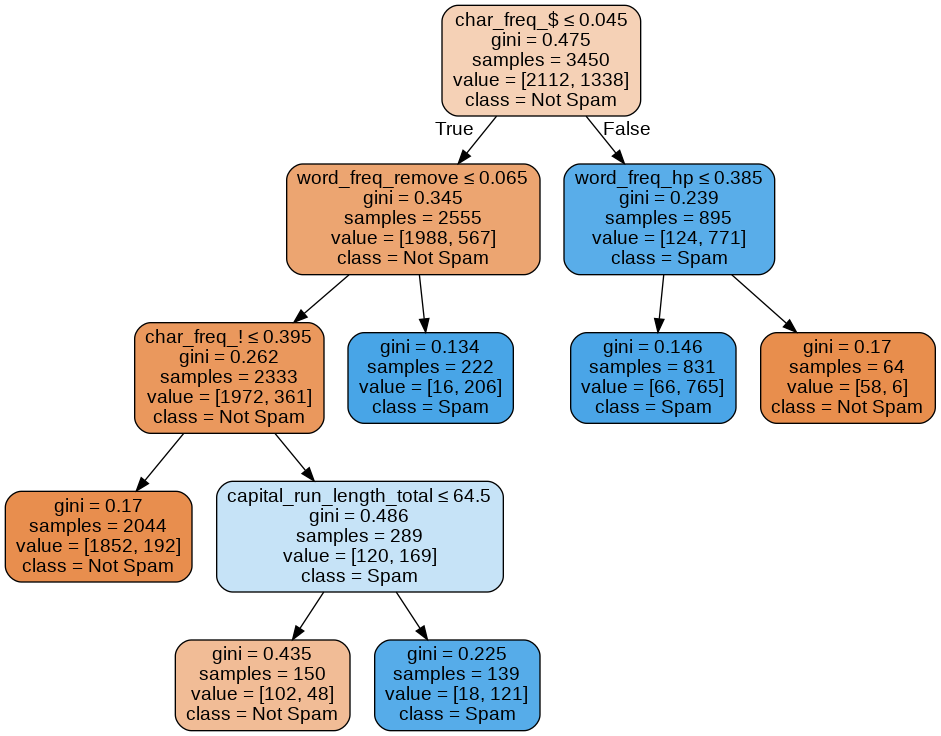

In [7]:
# Print the tree in a format that is easier to visualise.
clf2 = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.01, min_samples_split=20, criterion="gini",min_samples_leaf=5)
clf2.fit(X_train, Y_train)

export_graphviz(clf2, 'DAA_M05_Fig11.dot', feature_names = X_train.columns,class_names=['Not Spam', 'Spam'],filled=True, rounded=True,special_characters=True)
! dot -Tpng DAA_M05_Fig11.dot -o DAA_M05_Fig11.png

Image(filename='DAA_M05_Fig11.png') 